In [13]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\vanra\Desktop\bank_transactions_data_2.csv"


data = pd.read_csv(file_path)

# Display basic info
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data['TransactionType'] = data['TransactionType'].fillna('').str.lower()
data['fraud_flag'] = data['TransactionAmount'].apply(lambda x: 1 if x > 1000 else 0)  # Example condition


# TF-IDF Vectorization for text data
vectorizer = TfidfVectorizer(max_features=500)
text_features = vectorizer.fit_transform(data['TransactionType']).toarray()

# Normalize numerical features (e.g., 'amount')
scaler = StandardScaler()
data['TransactionAmount'] = scaler.fit_transform(data[['TransactionAmount']])

# Combine features
X = pd.concat([pd.DataFrame(text_features), data[['TransactionAmount']]], axis=1)
y = data['fraud_flag']  # Target variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


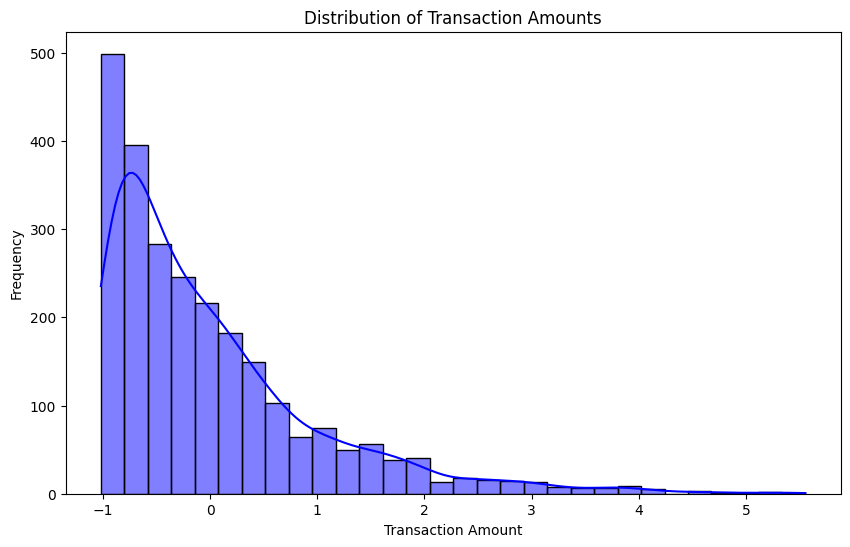

C:\Users\vanra\AppData\Local\Temp\ipykernel_28728\1797800784.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='fraud_flag', y='TransactionAmount', palette='Set2')


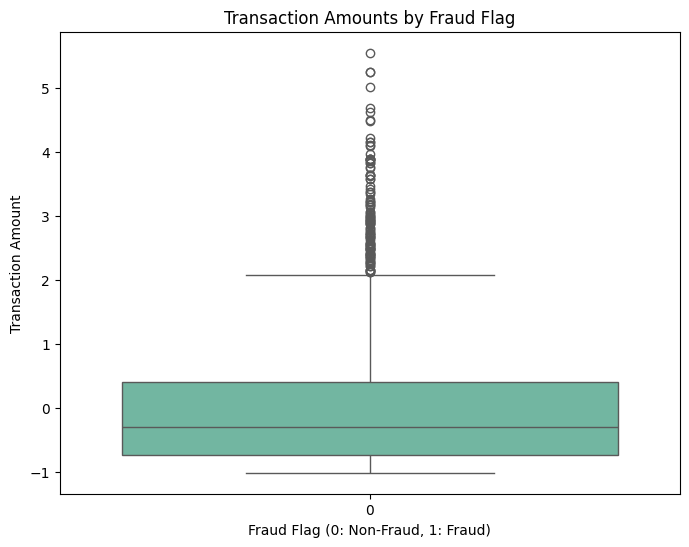

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(data['TransactionAmount'], kde=True, bins=30, color='blue')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Boxplot for transaction amounts by fraud flag
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='fraud_flag', y='TransactionAmount', palette='Set2')
plt.title('Transaction Amounts by Fraud Flag')
plt.xlabel('Fraud Flag (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Transaction Amount')
plt.show()


C:\Users\vanra\AppData\Local\Temp\ipykernel_28728\2901914107.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='fraud_flag', palette='Set3')


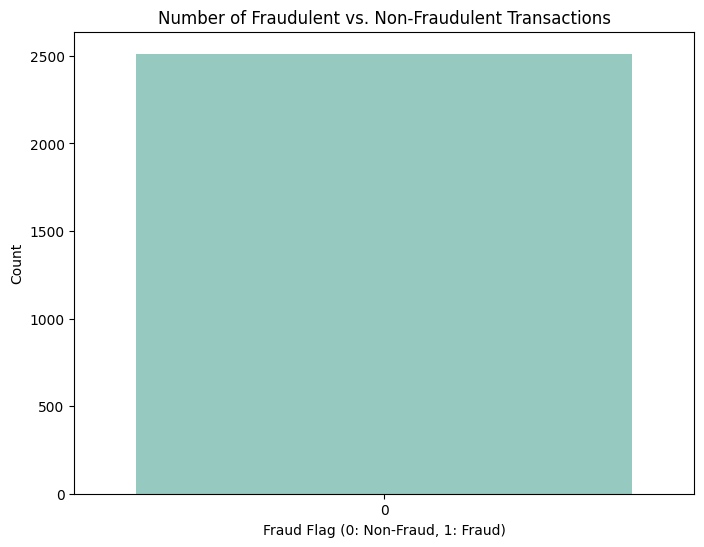

C:\Users\vanra\AppData\Local\Temp\ipykernel_28728\2901914107.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_descriptions.index, x=top_descriptions.values, palette='viridis')


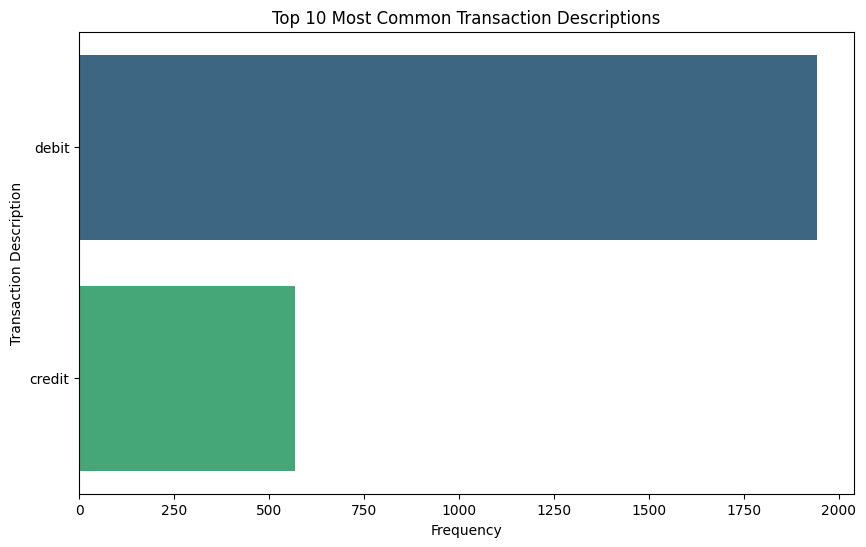

In [41]:
# Count of transactions per fraud flag
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='fraud_flag', palette='Set3')
plt.title('Number of Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Fraud Flag (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()

# Most common transaction descriptions
top_descriptions = data['TransactionType'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=top_descriptions.index, x=top_descriptions.values, palette='viridis')
plt.title('Top 10 Most Common Transaction Descriptions')
plt.xlabel('Frequency')
plt.ylabel('Transaction Description')
plt.show()


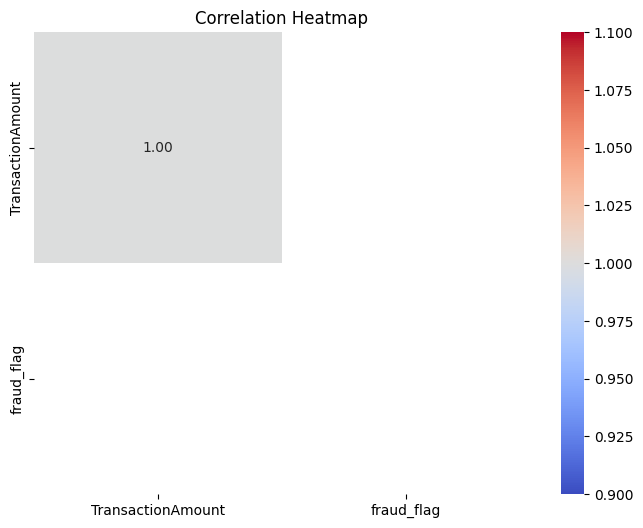

In [43]:
# Correlation heatmap for numerical features
plt.figure(figsize=(8, 6))
correlation_matrix = data[['TransactionAmount', 'fraud_flag']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [65]:
# Convert 'TransactionDate' to datetime
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'], format='%d-%m-%Y  %H:%M')

# Extract year, month, day, hour, and minute from 'TransactionDate'
data['Year'] = data['TransactionDate'].dt.year
data['Month'] = data['TransactionDate'].dt.month
data['Day'] = data['TransactionDate'].dt.day
data['Hour'] = data['TransactionDate'].dt.hour
data['Minute'] = data['TransactionDate'].dt.minute
data['DayOfWeek'] = data['TransactionDate'].dt.dayofweek  # Monday=0, Sunday=6

# Drop the original 'TransactionDate' column since we've extracted its components
data = data.drop(columns=['TransactionDate'])

# Now split the data into features (X) and target (y)
X = data.drop(columns=['fraud_flag'])  # Assuming 'fraud_flag' is the target
y = data['fraud_flag']


In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       754

    accuracy                           1.00       754
   macro avg       1.00      1.00      1.00       754
weighted avg       1.00      1.00      1.00       754

Confusion Matrix:
 [[754]]


C:\Users\vanra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
